In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [2]:
#TASK 1
DF = pd.read_csv("./Problem Set/ps2_assignment2wine.csv")

In [3]:
#Show Dataframe
DF.head()

,acidity,residualSugar,density,pH,alcohol
0,7.0,20.7,1.0010,3.00,8.8
1,6.3,1.6,0.9940,3.30,9.5
2,8.1,6.9,0.9951,3.26,10.1
3,7.2,8.5,0.9956,3.19,9.9
4,7.2,8.5,0.9956,3.19,9.9


In [4]:
#Separation of features and target
y = DF["alcohol"]
DF.drop("alcohol",axis=1,inplace=True)
X = DF

In [5]:
#Lineare Model selfmade
def WineModel_self(X,y):
    X_Transposed = X.transpose()
    w = (np.linalg.inv(X_Transposed.dot(X)).dot(X_Transposed)).dot(y)
    return w

In [6]:
w = WineModel_self(X,y)
for idx, wight in enumerate(w):
    print("W"+ str(idx+1) +" = " + str(wight))

W1 = -0.09196913286595226
W2 = -0.11150009603559405
W3 = 11.05431932580826
W4 = 0.2721091530740152


In [7]:
from sklearn.linear_model import LinearRegression 

In [8]:
#Linear Model by Scikit Learn
WineModel_SK = LinearRegression()
WineModel_SK.fit(X,y)
for idx, wight in enumerate(WineModel_SK.coef_):
    print("W"+ str(idx+1) +" = " + str(wight))

W1 = 0.5352304266481916
W2 = 0.23667817424712548
W3 = -685.8105090386645
W4 = 2.535445849566108


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 99)


In [10]:
w = WineModel_self(x_train,y_train)


In [11]:
def predict_alcohol(features,w):
    alc_pred = features.dot(w)
    return alc_pred

In [12]:
#Prediciton and Error Selfmade Model
prediction = predict_alcohol(x_test,w)
mean_squared_error(y_test,prediction)

1.1382794608162132

In [13]:
#Prediction and Error Scikit Model
prediction = WineModel_SK.predict(x_test)
mean_squared_error(y_test,prediction)

0.17342198358075994

In [14]:
#TASK 2
# Widrow-Hoff-Algorithm in Batch-Mode
def WHAlgorith_Batch(Features,Target,Eta):
    w = np.zeros(len(Features.columns),dtype=float)
    Timeline_loss = []
    for index,row in Features.iterrows():
        prediction = w.dot(row)
        loss = (prediction - Target[index])**2
        Timeline_loss.append(loss)
        w = w - Eta * ((w.dot(row) - Target[index]) * row)
    return (w,Timeline_loss)


# Widrow-Hoff-Algorithm in stochastic gradient descent
def WHAlgorith_SGD(Features,Target,Eta):
    import random
    Timeline_loss = []
    w = np.zeros(len(Features.columns),dtype=float)
    for index in range(len(Features.index)):
        rnd = random.randint(0,len(Features.index)-1)
        row = Features.iloc[rnd]
        prediction = w.dot(row)
        loss = (prediction - Target[index])**2
        Timeline_loss.append(loss)
        w = w - Eta * ((w.dot(row) - Target[rnd]) * row)

    return (w,Timeline_loss)

In [15]:
DF_Task2 = DF.drop(["acidity","pH"],axis=1)


In [16]:
wight, loss = WHAlgorith_SGD(DF_Task2,y,0.001)

residualSugar    0.034697
density          9.541218
dtype: float64


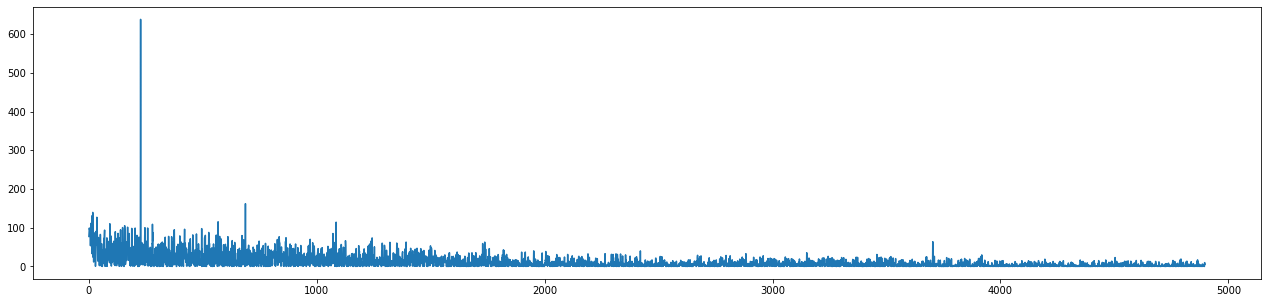

In [17]:
# Widrow-Hoff-Algorithm in stochastic gradient descent
print(wight)
plt.figure(figsize=(22,5))
sns.lineplot(x=range(len(loss)),y=loss)

In [18]:
wight, loss = WHAlgorith_Batch(DF_Task2,y,0.001)


residualSugar    0.101194
density          9.597535
dtype: float64


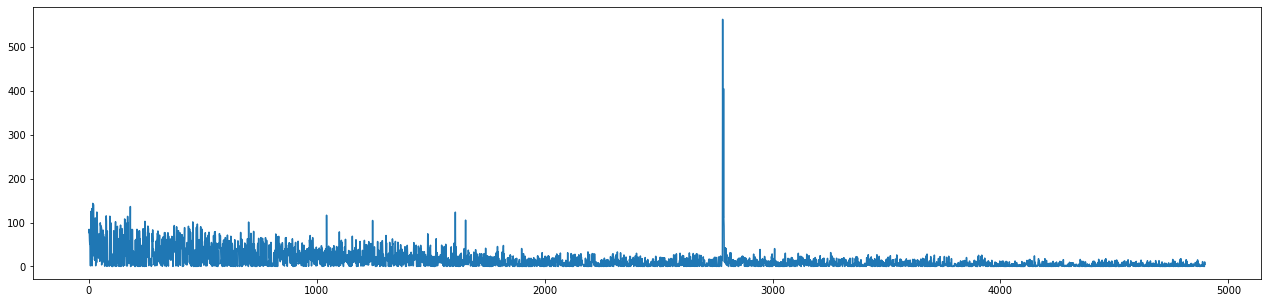

In [19]:
# Widrow-Hoff-Algorithm in Batch-Mode
print(wight)
plt.figure(figsize=(22,5))
sns.lineplot(x=range(len(loss)),y=loss)

In [20]:
DF_Task2_scaled = (DF_Task2 - DF_Task2.mean()) / DF_Task2.std()
y = (y - y.mean()) / y.std()

residualSugar    0.201095
density         -0.903716
dtype: float64


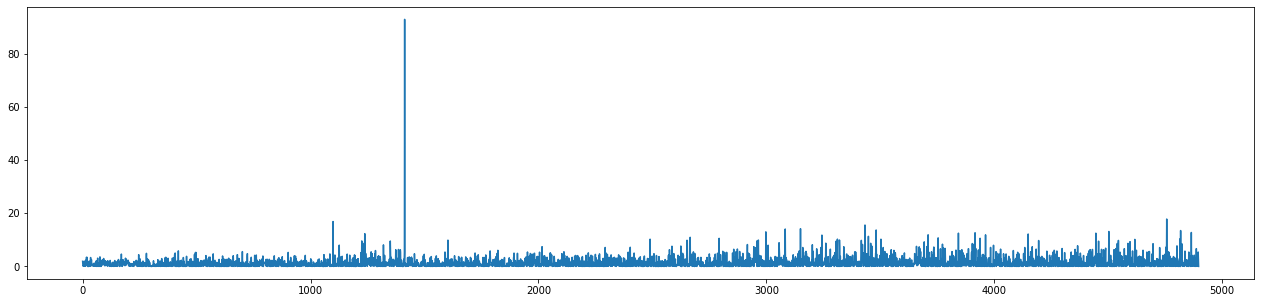

In [22]:
# Widrow-Hoff-Algorithm in stochastic gradient descent
wight, loss = WHAlgorith_SGD(DF_Task2_scaled,y,0.001)
print(wight)
plt.figure(figsize=(22,5))
sns.lineplot(x=range(len(loss)),y=loss)

residualSugar   -0.096482
density          0.571972
dtype: float64


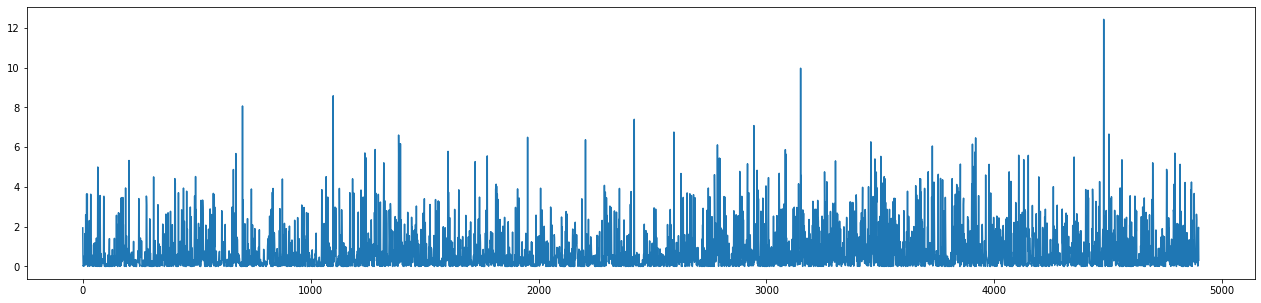

In [21]:
# Widrow-Hoff-Algorithm in Batch-Mode
wight, loss = WHAlgorith_Batch(DF_Task2,y,0.001)
print(wight)
plt.figure(figsize=(22,5))
sns.lineplot(x=range(len(loss)),y=loss)